In [1]:
import urllib
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
!pip install altair vega_datasets
import altair as alt

warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn import feature_selection as fs
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from scipy import stats


In [2]:
#Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
set1 = urllib.request.Request(url)
abalone_p = urllib.request.urlopen(set1)


In [3]:
#Load columns
abalone = pd.read_csv(abalone_p, header = None, names =['Sex', 'Length', 'Diameter', 'Height',
'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

In [4]:
#Check data types
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
#A brief view
abalone.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [6]:
#Make a copy of original dataset and use the new dataset called "abl" for following steps.
abl = abalone.copy()

In [7]:
#It seems that no attributes contain NaN values, check it to make sure.
abl.isnull().sum(axis=0)

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There is no null values.

In [8]:
#Show descriptive statistic table
display(HTML('<b>Table 1: Summary of continuous features</b>'))
display(abl.describe(include = ['int64','float64']))

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
abl_all = abl.drop(columns="Rings")
target = abl['Rings']

In [10]:
abl_all = pd.get_dummies(abl_all)
abl_all.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [11]:
abl_all.shape

(4177, 10)

In [12]:
target.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [13]:
abl_all.isnull().sum(axis=0)

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

There are no null values present.

# EDA

<AxesSubplot:xlabel='Length', ylabel='Sex_F'>

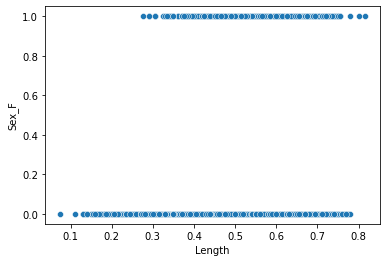

In [14]:
import seaborn as sns
sns.scatterplot(x="Length",y="Sex_F",data=abl_all)

Most of the females have length between 0.1 to 0.8. and males have 0.3 to 0.8.

<AxesSubplot:xlabel='Diameter', ylabel='Sex_F'>

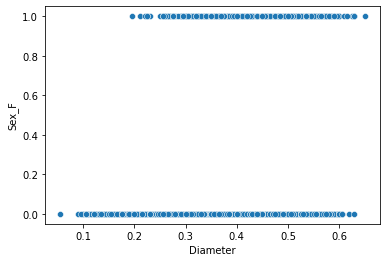

In [15]:
import seaborn as sns
sns.scatterplot(x="Diameter",y="Sex_F",data=abl_all)

The diameter is between 0.1 to 0.8.

<AxesSubplot:xlabel='Height', ylabel='Sex_F'>

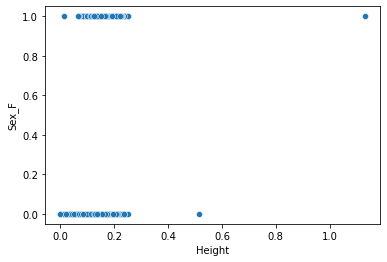

In [16]:
import seaborn as sns
sns.scatterplot(x="Height",y="Sex_F",data=abl_all)

The height is in between 0.0 to 0.4.

<AxesSubplot:xlabel='Whole weight', ylabel='Sex_M'>

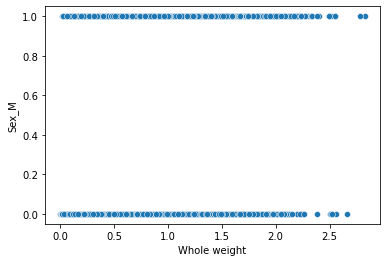

In [17]:
import seaborn as sns
sns.scatterplot(x="Whole weight",y="Sex_M",data=abl_all)

The weight is in between 0.0 to 2.5.

<AxesSubplot:xlabel='Shucked weight', ylabel='Sex_M'>

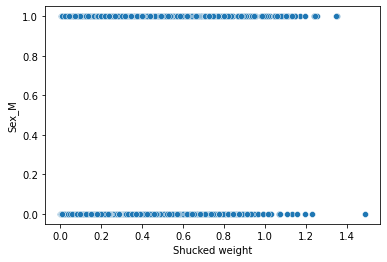

In [18]:
import seaborn as sns
sns.scatterplot(x="Shucked weight",y="Sex_M",data=abl_all)

The Shucked weight is in between 0.0 to 1.2.

<AxesSubplot:xlabel='Viscera weight', ylabel='Sex_M'>

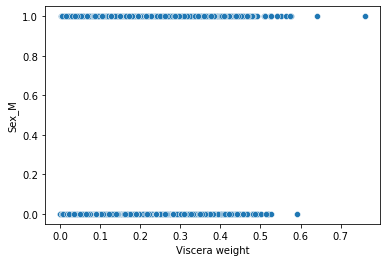

In [19]:
import seaborn as sns
sns.scatterplot(x="Viscera weight",y="Sex_M",data=abl_all)

<AxesSubplot:xlabel='Shell weight', ylabel='Sex_F'>

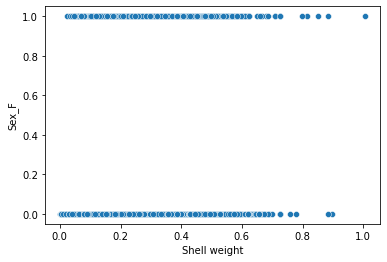

In [20]:
import seaborn as sns
sns.scatterplot(x="Shell weight",y="Sex_F",data=abl_all)

# CORRELATION

In [21]:
abl_all.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.318626,-0.564315,0.240376
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.298421,-0.518552,0.215459
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.299741,-0.557592,0.252038
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.263991,-0.521842,0.251793
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.308444,-0.556081,0.242194
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.306319,-0.546953,0.235391
Sex_F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,1.000000,-0.464298,-0.512528
Sex_I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.464298,1.000000,-0.522541
Sex_M,0.236543,0.240376,0.215459,0.252038,0.251793,0.242194,0.235391,-0.512528,-0.522541,1.000000


<AxesSubplot:>

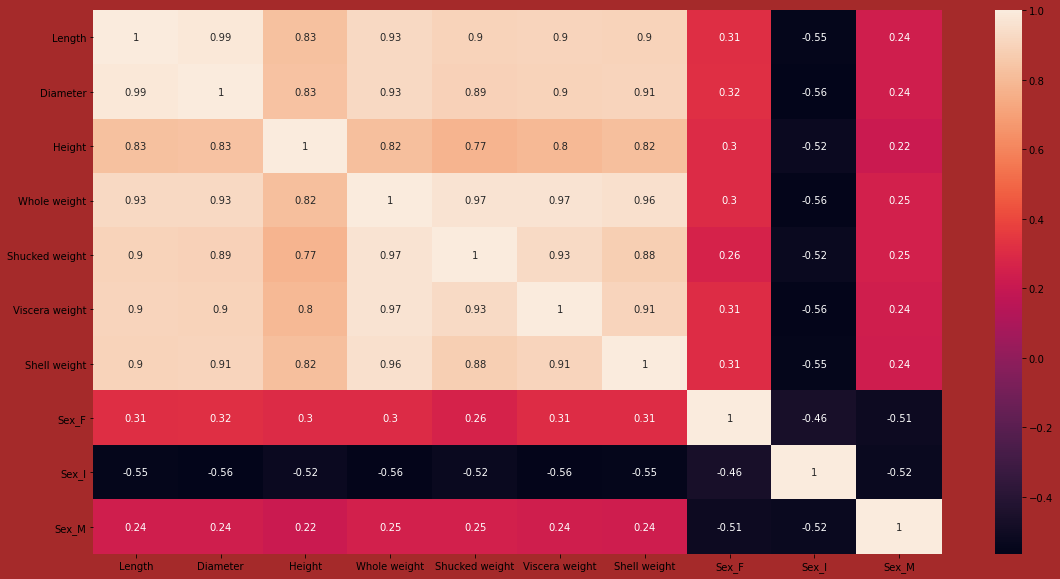

In [22]:
plt.figure(figsize=[19,10],facecolor='brown')
sns.heatmap(abl_all.corr(),annot=True)

# Pre Processing of Model

In [23]:
abl_unscaled=abl_all.values
abl_minmax = preprocessing.MinMaxScaler().fit_transform(abl_unscaled)

In [24]:
clf = KNeighborsClassifier(n_neighbors=1)

In [25]:
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

In [26]:
scoring_metric = 'accuracy'
cv_results_full = cross_val_score(estimator=clf,
 X=abl_minmax,
 y=target,
 cv=cv_method,
 scoring=scoring_metric)

In [27]:
cv_results_full

array([0.19258373, 0.20813397, 0.2       , 0.21077844, 0.21916168,
       0.19856459, 0.20454545, 0.21317365, 0.19041916, 0.2011976 ,
       0.21172249, 0.20813397, 0.19161677, 0.18323353, 0.19401198])

In [28]:
cv_results_full.mean().round(4)

0.2018

In [29]:
num_features = 10

In [30]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(abl_minmax, target)
fs_indices_fscore = np.argsort(fs_fit_fscore.scores_)[::-1][0:num_features]
fs_indices_fscore

array([1, 0, 6, 2, 3, 5, 4, 8, 7, 9], dtype=int64)

In [31]:
abl_all.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Sex_F               uint8
Sex_I               uint8
Sex_M               uint8
dtype: object

In [32]:
best_features_fscore = abl_all.columns[fs_indices_fscore].values
best_features_fscore

array(['Diameter', 'Length', 'Shell weight', 'Height', 'Whole weight',
       'Viscera weight', 'Shucked weight', 'Sex_I', 'Sex_F', 'Sex_M'],
      dtype=object)

In [33]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([196.43610528, 188.50942458, 147.23694566, 124.42771441,
       113.71233973, 103.72143783,  80.79767682,  68.87047717,
        15.78351983,  10.62934022])

In [34]:
def plot_imp(best_features, scores, method_name, color):

 df = pd.DataFrame({'features': best_features,
 'importances': scores})

 chart = alt.Chart(df,width=500,title=method_name + ' Feature Importances').mark_bar(opacity=0.75,color=color).encode(alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),alt.Y('importances', title='Importance'))

 return chart

In [35]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score', 'blue')

alt.Chart(...)

In [36]:
cv_results_fscore = cross_val_score(estimator=clf,
 X=abl_minmax[:, fs_indices_fscore[:8]],
 y=target,
 cv=cv_method,
 scoring=scoring_metric)
cv_results_fscore.mean().round(4)

0.2025

In [37]:
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(abl_minmax, target)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = abl_all.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['Shell weight', 'Diameter', 'Height', 'Whole weight', 'Length',
       'Viscera weight', 'Shucked weight', 'Sex_I', 'Sex_F', 'Sex_M'],
      dtype=object)

In [38]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.45458082, 0.39492169, 0.39397135, 0.39188989, 0.38731894,
       0.3770248 , 0.33430046, 0.14995685, 0.05636401, 0.03126118])

In [39]:
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information', 'pink')

alt.Chart(...)

In [40]:
cv_results_mutual_info = cross_val_score(estimator=clf,
 X=abl_minmax[:, fs_indices_mutual_info[:8]],
 y=target,
 cv=cv_method,
 scoring=scoring_metric)
cv_results_mutual_info.mean().round(4)

0.2025

In [41]:
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(abl_minmax, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [42]:
best_features_rfi = abl_all.columns[fs_indices_rfi].values
best_features_rfi

array(['Shell weight', 'Shucked weight', 'Whole weight', 'Viscera weight',
       'Length', 'Diameter', 'Height', 'Sex_M', 'Sex_F', 'Sex_I'],
      dtype=object)

In [43]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.16623212, 0.15230239, 0.14866318, 0.14780938, 0.11605792,
       0.11463762, 0.10406834, 0.01839956, 0.01727605, 0.01455343])

In [44]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'green')

alt.Chart(...)

In [45]:
cv_results_rfi = cross_val_score(estimator=clf,
 X=abl_minmax[:, fs_indices_rfi[:5]],
 y=target,
 cv=cv_method,
 scoring=scoring_metric)
cv_results_rfi.mean().round(4)


0.2116

In [46]:
print(stats.ttest_rel(cv_results_rfi, cv_results_fscore))
print(stats.ttest_rel(cv_results_rfi, cv_results_mutual_info))
print(stats.ttest_rel(cv_results_mutual_info, cv_results_fscore)) # they are equal

Ttest_relResult(statistic=2.702836791350596, pvalue=0.017161043382258018)
Ttest_relResult(statistic=2.702836791350596, pvalue=0.017161043382258018)
Ttest_relResult(statistic=nan, pvalue=nan)


In [47]:
print(stats.ttest_rel(cv_results_rfi, cv_results_full))

Ttest_relResult(statistic=3.069620795234529, pvalue=0.008319423198012177)


In [48]:
print(stats.ttest_rel(cv_results_rfi, cv_results_full))

Ttest_relResult(statistic=3.069620795234529, pvalue=0.008319423198012177)


In [49]:
abl_all.columns[fs_indices_rfi[:5]]


Index(['Shell weight', 'Shucked weight', 'Whole weight', 'Viscera weight',
       'Length'],
      dtype='object')

In [50]:
abl_minmax_df = pd.DataFrame(data = abl_minmax,columns = abl_all.columns)

In [51]:
abl_rfi = abl_minmax_df[abl_all.columns[fs_indices_rfi[:5]].values]

In [52]:
abl_rfi = abl_rfi.values

In [53]:
cv_method = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=4)

In [54]:
params_KNN = {'n_neighbors': [2,4,8,16,32,64], 
              'p': [1, 2]}

In [55]:
gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_KNN,cv=cv_method,verbose=1,scoring='accuracy', return_train_score=True)
# verbose: the higher, the more messagesscoring='accuracy',return_train_score=True)

In [56]:
gs_KNN.fit(abl_rfi, target);

Fitting 30 folds for each of 12 candidates, totalling 360 fits


In [57]:
gs_KNN.best_params_

{'n_neighbors': 64, 'p': 1}

In [58]:
gs_KNN.best_score_

0.26949311364305684

In [59]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])

In [60]:
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']

In [61]:
results_KNN['metric'] = results_KNN['p'].replace([1,2,3], ["Manhattan", "Euclidean", "Minkowski"
])
results_KNN

,n_neighbors,p,test_score,metric
0,2,1,0.219376,Manhattan
1,2,2,0.219778,Euclidean
2,4,1,0.220813,Manhattan
3,4,2,0.218742,Euclidean
4,8,1,0.244437,Manhattan
5,8,2,0.245074,Euclidean
6,16,1,0.251536,Manhattan
7,16,2,0.254729,Euclidean
8,32,1,0.259600,Manhattan
9,32,2,0.262789,Euclidean


In [62]:
alt.Chart(results_KNN,
 title='KNN Performance Comparison').mark_line(point=True).encode(
 alt.X('n_neighbors', title='Number of Neighbors'),
 alt.Y('test_score', title='Mean CV Score', scale=alt.Scale(zero=False)),
 color='metric')

alt.Chart(...)

In [63]:
df_classifier = DecisionTreeClassifier(random_state=4)
params_DT = {'criterion': ['gini', 'entropy'],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
 'min_samples_split': [2, 3]}
cv_method = RepeatedStratifiedKFold(n_splits=5,
 n_repeats=3,
 random_state=999)
gs_DT = GridSearchCV(estimator=df_classifier,
 param_grid=params_DT,
 cv=cv_method,
 verbose=1,
 scoring='accuracy')
gs_DT.fit(abl_rfi, target);


Fitting 15 folds for each of 32 candidates, totalling 480 fits


In [64]:
gs_DT.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}

In [65]:
gs_DT.best_score_

0.2669356979820264

In [66]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

In [67]:
alt.Chart(results_DT,
 title='DT Performance Comparison'
 ).mark_line(point=True).encode(
 alt.X('max_depth', title='Maximum Depth'),
 alt.Y('test_score', title='Mean CV Score', aggregate='average', scale=alt.Scale(zero=False
)),
 color='criterion'
)

alt.Chart(...)

In [68]:
df_classifier = RandomForestClassifier(random_state=4)
params_RF = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3, random_state=999)
gs_RF = GridSearchCV(estimator=df_classifier,param_grid=params_RF,cv=cv_method,verbose=1,scoring='accuracy')
gs_RF.fit(abl_rfi, target);

Fitting 15 folds for each of 32 candidates, totalling 480 fits


In [69]:
gs_RF.best_params_


{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}

In [70]:
gs_RF.best_score_


0.27627224020857805

In [71]:
gs_RF.cv_results_['mean_test_score']

array([0.2180972 , 0.2180972 , 0.25839632, 0.25839632, 0.27140676,
       0.27140676, 0.27395983, 0.27395983, 0.27236322, 0.27292191,
       0.27627224, 0.27555482, 0.27411722, 0.2735592 , 0.27100717,
       0.2707667 , 0.21259166, 0.21259166, 0.25504455, 0.25504455,
       0.27020944, 0.27020944, 0.27363961, 0.27363961, 0.27459722,
       0.27467696, 0.27579444, 0.27547451, 0.27611447, 0.27419821,
       0.26988845, 0.26749573])

In [72]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['test_score'] = gs_RF.cv_results_['mean_test_score']
results_RF.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

In [73]:
alt.Chart(results_RF,
 title='RF Performance Comparison'
 ).mark_line(point=True).encode(
 alt.X('max_depth', title='Maximum Depth'),
 alt.Y('test_score', title='Mean CV Score', aggregate='average', scale=alt.Scale(zero=False
)),
 color='criterion'
)

alt.Chart(...)

In [74]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [75]:
abl_power = PowerTransformer().fit_transform(abl_unscaled)

In [76]:
abl_power_df = pd.DataFrame(data = abl_power,columns = abl_all.columns)

In [77]:
abl_power_rfi = abl_power_df[abl_all.columns[fs_indices_rfi[:5]].values]
abl_power_rfi = abl_power_rfi.values

In [78]:
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv_method = RepeatedStratifiedKFold(n_splits=5,
 n_repeats=3,
 random_state=999)
gs_NB = GridSearchCV(estimator=nb_classifier,
 param_grid=params_NB,
 cv=cv_method,
 verbose=1,
 scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(abl_rfi)
gs_NB.fit(abl_power_rfi, target);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [79]:
gs_NB.best_params_

{'var_smoothing': 0.8111308307896871}

In [80]:
gs_NB.best_score_

0.26151276394579265

In [81]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [82]:
alt.Chart(results_NB,
 title='NB Performance Comparison').mark_line(point=True).encode(
 alt.X('var_smoothing', title='Var. Smoothing'),
 alt.Y('test_score', title='Mean CV Score', scale=alt.Scale(zero=False))).interactive()

alt.Chart(...)

In [ ]:
from sklearn.neural_network import MLPClassifier
df_classifier = MLPClassifier(max_iter = 100)
params_MLP = {'hidden_layer_sizes': [5, 10, 20],
 'alpha': [0.0001, 0.001],
 'solver': ['sgd', 'adam'],
 'learning_rate': ['constant','adaptive']}
cv_method = RepeatedStratifiedKFold(n_splits=5,
 n_repeats=3,
 random_state=999)
gs_MLP = GridSearchCV(estimator=df_classifier,
 param_grid=params_MLP,
 cv=cv_method,
 verbose=1,
 scoring='accuracy')
gs_MLP.fit(abl_rfi, target);

Fitting 15 folds for each of 24 candidates, totalling 360 fits


In [91]:
gs_MLP.best_params_


{'alpha': 0.001,
 'hidden_layer_sizes': 20,
 'learning_rate': 'constant',
 'solver': 'adam'}

In [92]:
gs_MLP.best_score_


0.26781518303106705

In [93]:
results_MLP = pd.DataFrame(gs_MLP.cv_results_['params'])
results_MLP['test_score'] = gs_MLP.cv_results_['mean_test_score']

In [94]:
results_MLP


,alpha,hidden_layer_sizes,learning_rate,solver,test_score
0,0.0001,5,constant,sgd,0.172213
1,0.0001,5,constant,adam,0.241558
2,0.0001,5,adaptive,sgd,0.173812
3,0.0001,5,adaptive,adam,0.235013
4,0.0001,10,constant,sgd,0.177714
5,0.0001,10,constant,adam,0.252973
6,0.0001,10,adaptive,sgd,0.183070
7,0.0001,10,adaptive,adam,0.257280
8,0.0001,20,constant,sgd,0.181790
9,0.0001,20,constant,adam,0.263427


In [101]:
kf = KFold(n_splits=5,random_state=4,shuffle=True)

In [102]:
test = []
prediction = []
model = LinearRegression()
for train_index,test_index in kf.split(abl_rfi):
 X_train,X_test = abl_rfi[train_index],abl_rfi[test_index]
 y_train, y_test = target.values[train_index], target.values[test_index]
 model.fit(X_train, y_train)
 pred = model.predict(X_test)

 prediction += [pred[x] for x in range(len(pred))]
 test += [y_test[x] for x in range(len(y_test))]


In [103]:
error = mean_squared_error(test,prediction)

In [104]:
print(error) # mean squared error
print(error**0.5) # root mean square

5.014940726597975
2.239406333517429


In [105]:
test = []
prediction = []
model = LogisticRegression()
for train_index,test_index in kf.split(abl_rfi):
 X_train,X_test = abl_rfi[train_index],abl_rfi[test_index]
 y_train, y_test = target.values[train_index], target.values[test_index]
 model.fit(X_train, y_train)
 pred = model.predict(X_test)

 prediction += [pred[x] for x in range(len(pred))]
 test += [y_test[x] for x in range(len(y_test))]

In [106]:
error = mean_squared_error(test,prediction)
print(error) # mean squared error
print(error**0.5) # root mean square

8.142686138376826
2.853539230215142


In [107]:
# LogisticRegression cross validation
model = LogisticRegressionCV()
cv_results_logic = cross_val_score(model,abl_rfi,target.values,cv = 5)

In [108]:
cv_results_logic.mean().round(4)


nan

In [114]:
cv_method_ttest =RepeatedStratifiedKFold(n_splits=10,random_state=111)
cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
 X=abl_rfi,
 y=target,
 cv=cv_method_ttest,
 n_jobs=-2,
 scoring='accuracy')
cv_results_KNN.mean()

0.2708413365001779

In [115]:
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
 X=abl_rfi,
 y=target,
 cv=cv_method_ttest,
 n_jobs=-2,
 scoring='accuracy')
cv_results_DT.mean()

0.2659086319461177

In [130]:
cv_results_RF = cross_val_score(estimator=gs_RF.best_estimator_,
 X=abl_rfi,
 y=target,
 cv=cv_method_ttest,
 n_jobs=-2,
 scoring='accuracy')
cv_results_RF.mean()

0.2712947345472904

In [117]:
cv_results_NB = cross_val_score(estimator=gs_NB.best_estimator_,
 X=abl_power_rfi,
 y=target,
 cv=cv_method_ttest,
 n_jobs=-2,
 scoring='accuracy')
cv_results_NB.mean()


0.26353751448601886

In [122]:
cv_results_MLP = cross_val_score(estimator=gs_MLP.best_estimator_,
 X=abl_rfi,
 y=target,
 cv=cv_method_ttest,
 n_jobs=-2,
 scoring='accuracy')
cv_results_MLP.mean()

0.26686734822668184

In [131]:
print(stats.ttest_rel(cv_results_RF, cv_results_KNN))
print(stats.ttest_rel(cv_results_RF, cv_results_DT))
print(stats.ttest_rel(cv_results_RF, cv_results_NB))
print(stats.ttest_rel(cv_results_RF, cv_results_MLP))


Ttest_relResult(statistic=0.26860114832087273, pvalue=0.7887955548866346)
Ttest_relResult(statistic=3.781707590352918, pvalue=0.0002665945577405846)
Ttest_relResult(statistic=5.10578508693678, pvalue=1.5977876104789314e-06)
Ttest_relResult(statistic=2.7415655555323935, pvalue=0.007256894397391026)


In [132]:
pred_KNN = gs_KNN.predict(abl_rfi)
pred_DT = gs_DT.predict(abl_rfi)
pred_RF = gs_RF.predict(abl_rfi)
pred_NB = gs_NB.predict(abl_power_rfi)
pred_MLP = gs_MLP.predict(abl_rfi)

In [133]:
#print("\nClassification report for K-Nearest Neighbor")
#print(metrics.classification_report(target, pred_KNN))
#print("\nClassification report for Decision Tree")
#print(metrics.classification_report(target, pred_DT))
print("\nClassification report for Random Forest")
print(metrics.classification_report(target, pred_RF))
#print("\nClassification report for Gaussian Naive Bayes")
#print(metrics.classification_report(target, pred_NB))
#print("\nClassification report for Multi-layer Perceptron")
#print(metrics.classification_report(target, pred_MLP))


Classification report for Random Forest
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.67      0.27      0.38        15
           4       0.53      0.60      0.56        57
           5       0.46      0.48      0.47       115
           6       0.44      0.27      0.33       259
           7       0.34      0.51      0.41       391
           8       0.32      0.41      0.36       568
           9       0.29      0.41      0.34       689
          10       0.24      0.39      0.29       634
          11       0.30      0.28      0.29       487
          12       0.47      0.03      0.06       267
          13       0.12      0.00      0.01       203
          14       0.00      0.00      0.00       126
          15       0.00      0.00      0.00       103
          16       1.00      0.01      0.03        67
          17       0.00      0.00      0

In [134]:
print("\nConfusion matrix for K-Nearest Neighbor")
print(metrics.confusion_matrix(target, pred_RF))


Confusion matrix for K-Nearest Neighbor
[[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   4  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   1  34  16   5   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  15  55  27  18   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2  29  69 126  26   5   2   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2  13  27 201 116  28   3   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   6  11 101 235 167  45   3   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  

In [147]:
import joblib
joblib.dump(gs_RF.best_estimator_,"Abalon.pkl")

['Abalon.pkl']